In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
# !wget nlp.stanford.edu/data/glove.6B.zip

In [ ]:
# !unzip glove.6B.zip

In [ ]:
!pip install better_profanity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 2.6 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier

In [ ]:
import tensorflow as tf

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.svm import SVC
from transformers import TFBertModel, BertTokenizer,TFDistilBertForSequenceClassification,DistilBertTokenizer


In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))


In [ ]:
import tensorflow as tf
import keras

In [ ]:
from tensorflow.keras.utils import to_categorical,pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense,Dropout,LSTM,GRU,Concatenate,Bidirectional,Lambda,Conv1D,MaxPooling1D,Flatten,Embedding,MultiHeadAttention,GlobalAveragePooling1D,LayerNormalization,Input,BatchNormalization,Reshape
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from keras.layers import Embedding
from tensorflow.keras import regularizers


In [ ]:
data=pd.read_csv("/content/sarcasm-200000.csv")

In [ ]:
data.columns

Index(['label', 'comment', 'author', 'subreddit', 'score', 'ups', 'downs',
       'date', 'created_utc', 'parent_comment'],
      dtype='object')

In [ ]:
len(data)

200000

In [ ]:
data['label'].value_counts()

1    100000
0    100000
Name: label, dtype: int64

In [ ]:
# data = data[~data['label'].str.match('^A+$')]
# data['label'] = data['label'].str.replace('A', '')


In [ ]:
# data['comment'] = data['comment'].str.lower()
# data['comment'] = data['comment'].str.replace('[^\w\s]','')

In [ ]:
# data['parent_comment'] = data['parent_comment'].str.lower()
# data['parent_comment'] = data['parent_comment'].str.replace('[^\w\s]','')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   label           200000 non-null  int64 
 1   comment         199988 non-null  object
 2   author          200000 non-null  object
 3   subreddit       200000 non-null  object
 4   score           200000 non-null  int64 
 5   ups             200000 non-null  int64 
 6   downs           200000 non-null  int64 
 7   date            200000 non-null  object
 8   created_utc     200000 non-null  object
 9   parent_comment  200000 non-null  object
dtypes: int64(4), object(6)
memory usage: 15.3+ MB


In [ ]:
data['label'].value_counts()

1    100000
0    100000
Name: label, dtype: int64

In [ ]:
data.head(10)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,1,Sometimes you just have to accept collateral d...,Subjugator,Libertarian,1,1,0,2015-01,09-01-2015 21:22,I wonder what the results for Americans would ...
1,0,Carlton would be next then.. Soon after our Ch...,Nuclearpoopshake,pics,1,1,0,2014-01,01-01-2014 21:34,"Well, it's gonna get worse. Stars always die i..."
2,1,It was grape juice silly.,lady_wildcat,atheism,1,1,0,2015-06,05-06-2015 00:44,Why would someone who changed water into wine ...
3,0,Or play competitive games where communication ...,Whatever_It_Takes,Overwatch,16,-1,-1,2016-11,27-11-2016 18:02,"If I wanted to talk to strangers online, I wou..."
4,0,"Dear Trump supporters, Have fun with the risin...",Super_Cephalopod,EnoughTrumpSpam,9,-1,-1,2016-11,09-11-2016 15:45,"AMERICA. If you vote this up, it will show up ..."
5,0,The 'dog' hypothesis is not a logical conclusi...,Aerothermal,teaching,2,2,0,2016-04,17-04-2016 10:02,We were looking for dog...
6,1,"Oh come on man, it's with Di Maria's strong fo...",Ftlot,FIFA,3,3,0,2016-07,03-07-2016 15:26,The Definition of 90th minute aids
7,1,"Tulsi can't be liberal, she was vehemently aga...",zoidboix,politics,2,2,0,2016-04,18-04-2016 22:19,But Tulsi Gabbard now there's true liberal icon.
8,1,It's terrible what Uber is doing to this city!,ev3to,toronto,16,16,0,2015-07,15-07-2015 02:52,Uber vs. taxi: Which is faster/cheaper for Pan...
9,0,I like your creativity...,beastgamer9136,Shitty_Car_Mods,1,1,0,2014-05,01-05-2014 10:53,If it was covered in well sculpted alien dicks...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   label           200000 non-null  int64 
 1   comment         199988 non-null  object
 2   author          200000 non-null  object
 3   subreddit       200000 non-null  object
 4   score           200000 non-null  int64 
 5   ups             200000 non-null  int64 
 6   downs           200000 non-null  int64 
 7   date            200000 non-null  object
 8   created_utc     200000 non-null  object
 9   parent_comment  200000 non-null  object
dtypes: int64(4), object(6)
memory usage: 15.3+ MB


In [ ]:
data['comment']=data['comment'].dropna(axis=0)

In [ ]:
data=data.fillna('')

In [ ]:
sarcasm_data=data.loc[data['label']==1]
normal_data=data.loc[data['label']==0]

In [ ]:
def Preprocess(text):
    text=text.lower()
    if pd.isnull(text):
        return ''
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.lemma_ not in stop_words]
    return " ".join(tokens)


In [ ]:
#data['comment'] = data['comment'].apply(Preprocess)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   label           200000 non-null  int64 
 1   comment         200000 non-null  object
 2   author          200000 non-null  object
 3   subreddit       200000 non-null  object
 4   score           200000 non-null  int64 
 5   ups             200000 non-null  int64 
 6   downs           200000 non-null  int64 
 7   date            200000 non-null  object
 8   created_utc     200000 non-null  object
 9   parent_comment  200000 non-null  object
dtypes: int64(4), object(6)
memory usage: 15.3+ MB


In [ ]:
# text_features = ['comment', 'author', 'subreddit', 'parent_comment']
# numeric_features = ['score', 'ups', 'downs']
# X_text = data.loc[:499, text_features].apply(lambda x: ' '.join(x), axis=1)  # Take the first 5000 rows
# X_numeric = data.loc[:499, numeric_features]

# vectorizer = TfidfVectorizer()
# X_text_tfidf = vectorizer.fit_transform(X_text)

# X_combined = pd.concat([pd.DataFrame(X_text_tfidf.toarray()), X_numeric], axis=1)

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_combined)

# df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])


# plt.scatter(df_pca['PC1'], df_pca['PC2'], c=data.loc[:499, 'label'], cmap='viridis', alpha=0.5)
# plt.title('2D PCA Visualization (First 5000 rows)')
# plt.xlabel('Principal Component 1 (PC1)')
# plt.ylabel('Principal Component 2 (PC2)')
# plt.show()

In [ ]:
X=data["comment"]
y=data["label"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=100000,ngram_range=(1,3))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
log_model=LogisticRegression(max_iter=100000,random_state=42,n_jobs=4)
log_model.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=100000, n_jobs=4, random_state=42)

In [ ]:
log_pred=log_model.predict(X_test_tfidf)

In [ ]:
accuracy_log=accuracy_score(log_pred,y_test)
precision_log=precision_score(log_pred,y_test)
recall_log=recall_score(log_pred,y_test)
f1_log = 2 * (precision_log * recall_log) / (precision_log + recall_log)
print(f"Accuracy score of Logistic Regression model:{accuracy_log}")
print(f"Precision score of Logistic Regression model:{precision_log}")
print(f"Recall score of Logistic Regression model:{recall_log}")
print(f"F1-score of Logistic Regression model:{f1_log}")

Accuracy score of Logistic Regression model:0.705125
Precision score of Logistic Regression model:0.6690112540192926
Recall score of Logistic Regression model:0.7188900286130756
F1-score of Logistic Regression model:0.6930543628178104


In [ ]:
from sklearn.metrics import roc_curve, auc


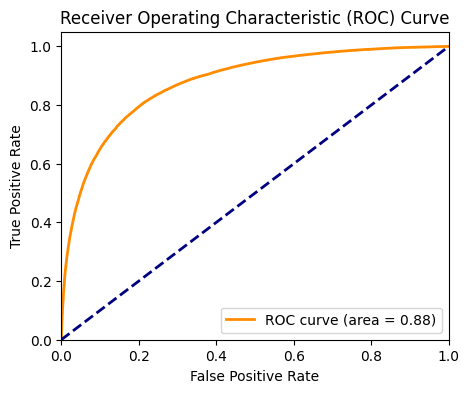

In [ ]:
y_pred_proba = log_model.predict_proba(X_train_tfidf)[:,1]

fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

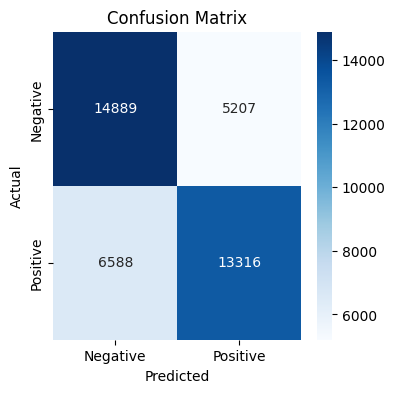

In [ ]:
conf_matrix = confusion_matrix(y_test, log_pred)

plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# xgb_model=XGBClassifier(learning_rate=0.0005,max_depth=20,n_estimators=70)
# xgb_model.fit(X_train_tfidf,y_train)

In [ ]:
# xgb_pred=xgb_model.predict(X_test_tfidf)

In [ ]:
# accuracy_xgb=accuracy_score(xgb_pred,y_test)
# precision_xgb=precision_score(xgb_pred,y_test)
# recall_xgb=recall_score(xgb_pred,y_test)
# print(f"Accuracy score of Xgboost model:{accuracy_xgb}")
# print(f"Precision score of Xgboost model:{precision_xgb}")
# print(f"Recall score of Xgboost model:{recall_xgb}")

In [ ]:
sentences=data["comment"]
labels=data["label"]


train_text,val_text,train_labels,val_labels=train_test_split(sentences,labels,test_size=0.2,random_state=42,stratify=labels)
val_text,test_text,val_labels,test_labels=train_test_split(val_text,val_labels,test_size=0.5,random_state=42,stratify=val_labels)

In [ ]:
def LossesAndScores(history):
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']

  print("_________LATEST MEASURES__________")
  print("Last Training Accuracy:", train_accuracy[-1])
  print("Last Validation Accuracy:", val_accuracy[-1])
  print("Last Training Loss:", train_loss[-1])
  print("Last Validation Loss:", val_loss[-1])

  print("_________BEST MEASURES___________")
  print("Maximum Training Accuracy:", max(train_accuracy))
  print("Maximum Validation Accuracy:", max(val_accuracy))
  print("Minimum Training Loss:", min(train_loss))
  print("Minimum Validation Loss:", min(val_loss))



In [ ]:
def PlotMeasures(history):
  plt.figure(figsize=(5,4))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.figure(figsize=(5,4))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
max_len = 20
oov_token = '00_V'
padding_type = 'pre'
trunc_type = 'pre'

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_text)
vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size: ",vocab_size)

Vocab Size:  65710


In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_text)
train_text = pad_sequences(train_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(val_text)
val_text = pad_sequences(val_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_text)
test_text = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

In [ ]:
class EncoderTransformer(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, heads, neurons, dropout_rate=0.3, l2_reg=1e-2):
        super(EncoderTransformer, self).__init__()
        self.attention = MultiHeadAttention(num_heads=heads, key_dim=embedding_dim)
        self.nn1 = Sequential([
            Dense(neurons*2, activation='relu'),
            Dense(embedding_dim, activation='relu')
        ])
        self.dropout1 = Dropout(dropout_rate)
        self.layernorm1 = LayerNormalization(epsilon=1e-6)

        self.conv1d = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')
        self.pooling = GlobalAveragePooling1D()
        self.dense1 = Dense(64, activation='relu')
        self.dropout2 = Dropout(dropout_rate)
        self.dense2 = Dense(embedding_dim, activation='relu')
        self.layernorm2 = LayerNormalization(epsilon=1e-6)

    def call(self, inputs, training):
        attn_output = self.attention(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)

        ffn_output = self.nn1(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)

        conv_output = self.conv1d(out2)
        return conv_output

class AttentionEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(AttentionEmbedding, self).__init__()
        self.token_emb = Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

embedding_dim = 40
heads = 2
neurons = 16
maxlen = 20

inputs = Input(shape=(maxlen,))
embedding_layer = AttentionEmbedding(maxlen, vocab_size, embedding_dim)
x = embedding_layer(inputs)
x = EncoderTransformer(embedding_dim, heads, neurons, dropout_rate=0.5)(x)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model_t = tf.keras.models.Model(inputs, output)

model_t.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0.001, patience = 6, verbose = 1)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=3,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.00000001)

In [ ]:
chk_t = ModelCheckpoint('model-attention2.tf',
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

In [ ]:
model_t.compile(loss='binary_crossentropy', optimizer=Adam(0.00001), metrics=['accuracy'])

In [ ]:
model_t.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 attention_embedding (Atten  (None, 20, 40)            2629200   
 tionEmbedding)                                                  
                                                                 
 encoder_transformer (Encod  (None, 20, 64)            23616     
 erTransformer)                                                  
                                                                 
 global_average_pooling1d_1  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                             

In [ ]:
history_t = model_t.fit(train_text,train_labels,
                    validation_data=(val_text,val_labels),
                    epochs=25,
                    batch_size=16,
                    callbacks=[earlystopping,learning_rate_reduction,chk_t])

Epoch 1/25
 9998/10000 [============================>.] - ETA: 0s - loss: 0.7039 - accuracy: 0.5107
Epoch 1: val_loss improved from inf to 0.68637, saving model to model-attention2.tf


10000/10000 [==============================] - 103s 9ms/step - loss: 0.7039 - accuracy: 0.5107 - val_loss: 0.6864 - val_accuracy: 0.5861 - lr: 1.0000e-05
Epoch 2/25
10000/10000 [==============================] - ETA: 0s - loss: 0.6830 - accuracy: 0.5542
Epoch 2: val_loss improved from 0.68637 to 0.66005, saving model to model-attention2.tf


10000/10000 [==============================] - 78s 8ms/step - loss: 0.6830 - accuracy: 0.5542 - val_loss: 0.6600 - val_accuracy: 0.6281 - lr: 1.0000e-05
Epoch 3/25
 9998/10000 [============================>.] - ETA: 0s - loss: 0.6493 - accuracy: 0.6208
Epoch 3: val_loss improved from 0.66005 to 0.62266, saving model to model-attention2.tf


10000/10000 [==============================] - 79s 8ms/step - loss: 0.6494 - accuracy: 0.6208 - val_loss: 0.6227 - val_accuracy: 0.6552 - lr: 1.0000e-05
Epoch 4/25
10000/10000 [==============================] - ETA: 0s - loss: 0.6185 - accuracy: 0.6598
Epoch 4: val_loss improved from 0.62266 to 0.60872, saving model to model-attention2.tf


10000/10000 [==============================] - 79s 8ms/step - loss: 0.6185 - accuracy: 0.6598 - val_loss: 0.6087 - val_accuracy: 0.6683 - lr: 1.0000e-05
Epoch 5/25
 9995/10000 [============================>.] - ETA: 0s - loss: 0.5992 - accuracy: 0.6792
Epoch 5: val_loss improved from 0.60872 to 0.60079, saving model to model-attention2.tf


10000/10000 [==============================] - 79s 8ms/step - loss: 0.5992 - accuracy: 0.6792 - val_loss: 0.6008 - val_accuracy: 0.6707 - lr: 1.0000e-05
Epoch 6/25
 9996/10000 [============================>.] - ETA: 0s - loss: 0.5843 - accuracy: 0.6922
Epoch 6: val_loss improved from 0.60079 to 0.59775, saving model to model-attention2.tf


10000/10000 [==============================] - 79s 8ms/step - loss: 0.5843 - accuracy: 0.6922 - val_loss: 0.5978 - val_accuracy: 0.6764 - lr: 1.0000e-05
Epoch 7/25
 9997/10000 [============================>.] - ETA: 0s - loss: 0.5721 - accuracy: 0.7041
Epoch 7: val_loss improved from 0.59775 to 0.59655, saving model to model-attention2.tf


10000/10000 [==============================] - 79s 8ms/step - loss: 0.5720 - accuracy: 0.7041 - val_loss: 0.5965 - val_accuracy: 0.6777 - lr: 1.0000e-05
Epoch 8/25
10000/10000 [==============================] - ETA: 0s - loss: 0.5619 - accuracy: 0.7114
Epoch 8: val_loss did not improve from 0.59655
10000/10000 [==============================] - 77s 8ms/step - loss: 0.5619 - accuracy: 0.7114 - val_loss: 0.5967 - val_accuracy: 0.6770 - lr: 1.0000e-05
Epoch 9/25
 9998/10000 [============================>.] - ETA: 0s - loss: 0.5537 - accuracy: 0.7193
Epoch 9: val_loss did not improve from 0.59655
10000/10000 [==============================] - 76s 8ms/step - loss: 0.5537 - accuracy: 0.7193 - val_loss: 0.6002 - val_accuracy: 0.6779 - lr: 1.0000e-05
Epoch 10/25
 9996/10000 [============================>.] - ETA: 0s - loss: 0.5456 - accuracy: 0.7254
Epoch 10: ReduceLROnPlateau reducing learning rate to 1.9999999494757505e-06.

Epoch 10: val_loss did not improve from 0.59655
10000/10000 [======

In [ ]:
LossesAndScores(history_t)

_________LATEST MEASURES__________
Last Training Accuracy: 0.7349249720573425
Last Validation Accuracy: 0.6783999800682068
Last Training Loss: 0.5331778526306152
Last Validation Loss: 0.6048650145530701
_________BEST MEASURES___________
Maximum Training Accuracy: 0.7349249720573425
Maximum Validation Accuracy: 0.6790000200271606
Minimum Training Loss: 0.5331778526306152
Minimum Validation Loss: 0.5965455770492554


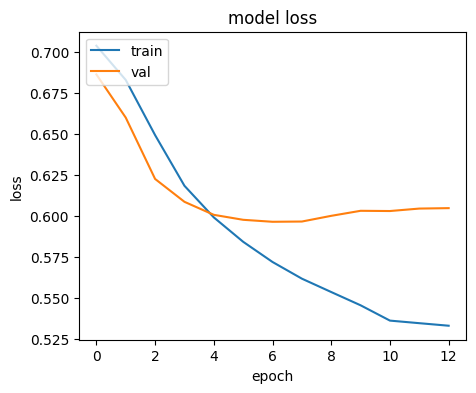

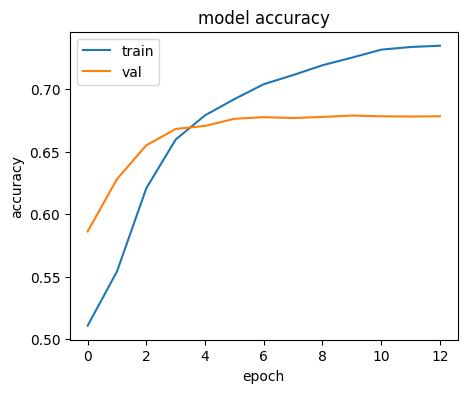

In [ ]:
PlotMeasures(history_t)

In [ ]:
def build_siamese_network(max_len, vocab_size, embedding_dim, dense_units=(128, 64), dropout_rate=0.25):
    input_layer = Input(shape=(max_len,), dtype='int32')

    embedding_layer = Embedding(input_dim=vocab_size,
                                output_dim=embedding_dim,
                                input_length=max_len)(input_layer)

    flattened_embedding = Flatten()(embedding_layer)
    flattened_embedding = Dropout(dropout_rate)(flattened_embedding)

    left_branch = Dense(dense_units[0], activation='relu')(flattened_embedding)
    right_branch = Dense(dense_units[0]//2, activation='relu')(flattened_embedding)

    left_branch = Dropout(dropout_rate)(left_branch)
    left_branch = Dense(dense_units[1]//2, activation='relu')(left_branch)
    right_branch = Dropout(dropout_rate)(right_branch)
    right_branch = Dense(dense_units[1]//4, activation='relu')(right_branch)

    merged_layer = Concatenate()([left_branch, right_branch])

    similarity_layer = Dense(1, activation='sigmoid')(merged_layer)

    siamese_model = tf.keras.models.Model(inputs=input_layer, outputs=similarity_layer)

    return siamese_model

In [ ]:
embedding_dim = 40
maxlen=20
siamese_model=build_siamese_network(maxlen,vocab_size,embedding_dim)

In [ ]:
siamese_model.compile(loss='binary_crossentropy', optimizer=Adam(0.00001), metrics=['accuracy'])

In [ ]:
chk_s = ModelCheckpoint('model-siamese2.tf',
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

In [ ]:
history_s = siamese_model.fit(train_text,train_labels,
                    validation_data=(val_text,val_labels),
                    epochs=25,
                    batch_size=16,
                    callbacks=[earlystopping,learning_rate_reduction,chk_s])

Epoch 1/25
 9990/10000 [============================>.] - ETA: 0s - loss: 0.6883 - accuracy: 0.5449
Epoch 1: val_loss improved from inf to 0.68247, saving model to model-siamese2.tf
10000/10000 [==============================] - 57s 5ms/step - loss: 0.6883 - accuracy: 0.5449 - val_loss: 0.6825 - val_accuracy: 0.5600 - lr: 1.0000e-05
Epoch 2/25
 9988/10000 [============================>.] - ETA: 0s - loss: 0.6801 - accuracy: 0.5657
Epoch 2: val_loss improved from 0.68247 to 0.67368, saving model to model-siamese2.tf
10000/10000 [==============================] - 47s 5ms/step - loss: 0.6801 - accuracy: 0.5657 - val_loss: 0.6737 - val_accuracy: 0.5763 - lr: 1.0000e-05
Epoch 3/25
 9998/10000 [============================>.] - ETA: 0s - loss: 0.6668 - accuracy: 0.5960
Epoch 3: val_loss improved from 0.67368 to 0.65592, saving model to model-siamese2.tf
10000/10000 [==============================] - 46s 5ms/step - loss: 0.6668 - accuracy: 0.5960 - val_loss: 0.6559 - val_accuracy: 0.6155 - lr

In [ ]:
LossesAndScores(history_s)

_________LATEST MEASURES__________
Last Training Accuracy: 0.7454562783241272
Last Validation Accuracy: 0.6843000054359436
Last Training Loss: 0.518687903881073
Last Validation Loss: 0.6005686521530151
_________BEST MEASURES___________
Maximum Training Accuracy: 0.7454562783241272
Maximum Validation Accuracy: 0.6843000054359436
Minimum Training Loss: 0.518687903881073
Minimum Validation Loss: 0.595759391784668


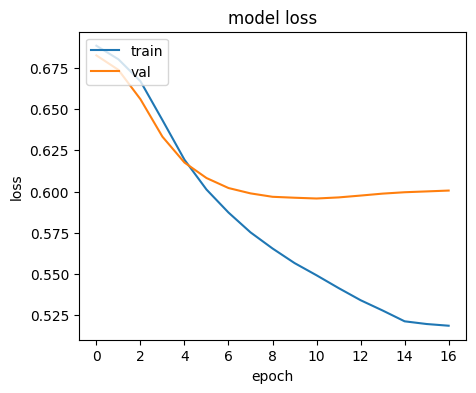

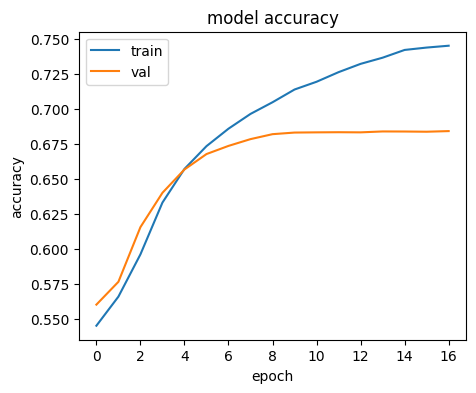

In [ ]:
PlotMeasures(history_s)

In [ ]:
bi_gru_model=Sequential([
    Embedding(vocab_size, embedding_dim, input_length=maxlen),
    Bidirectional(GRU(64, return_sequences=True)),
    Dropout(0.35),
    BatchNormalization(),
    Bidirectional(GRU(32,kernel_regularizer=regularizers.l2(1e-4))),
    Dropout(0.35),
    BatchNormalization(),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1,activation='sigmoid')
])

In [ ]:
bi_gru_model.compile(loss='binary_crossentropy', optimizer=Adam(0.00001), metrics=['accuracy'])

In [ ]:
chk_gru = ModelCheckpoint('model-gru2.tf',
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

In [ ]:
history_g=bi_gru_model.fit(train_text,train_labels,
                    validation_data=(val_text,val_labels),
                    epochs=25,
                    batch_size=64,
                    callbacks=[earlystopping,learning_rate_reduction,chk_gru])

Epoch 1/25
2500/2500 [==============================] - ETA: 0s - loss: 0.8147 - accuracy: 0.5106
Epoch 1: val_loss improved from inf to 0.71365, saving model to model-gru2.tf
2500/2500 [==============================] - 213s 82ms/step - loss: 0.8147 - accuracy: 0.5106 - val_loss: 0.7137 - val_accuracy: 0.5488 - lr: 1.0000e-05
Epoch 2/25
   2/2500 [..............................] - ETA: 2:53 - loss: 0.8095 - accuracy: 0.5078

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

2500/2500 [==============================] - ETA: 0s - loss: 0.7640 - accuracy: 0.5261
Epoch 2: val_loss improved from 0.71365 to 0.70449, saving model to model-gru2.tf
2500/2500 [==============================] - 187s 75ms/step - loss: 0.7640 - accuracy: 0.5261 - val_loss: 0.7045 - val_accuracy: 0.5666 - lr: 1.0000e-05
Epoch 3/25
   2/2500 [..............................] - ETA: 2:49 - loss: 0.7467 - accuracy: 0.5547

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

2500/2500 [==============================] - ETA: 0s - loss: 0.7377 - accuracy: 0.5459
Epoch 3: val_loss improved from 0.70449 to 0.69843, saving model to model-gru2.tf
2500/2500 [==============================] - 186s 74ms/step - loss: 0.7377 - accuracy: 0.5459 - val_loss: 0.6984 - val_accuracy: 0.5711 - lr: 1.0000e-05
Epoch 4/25
   2/2500 [..............................] - ETA: 2:35 - loss: 0.7187 - accuracy: 0.5391

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

2500/2500 [==============================] - ETA: 0s - loss: 0.7240 - accuracy: 0.5564
Epoch 4: val_loss improved from 0.69843 to 0.69064, saving model to model-gru2.tf
2500/2500 [==============================] - 186s 75ms/step - loss: 0.7240 - accuracy: 0.5564 - val_loss: 0.6906 - val_accuracy: 0.5826 - lr: 1.0000e-05
Epoch 5/25
   2/2500 [..............................] - ETA: 2:59 - loss: 0.7121 - accuracy: 0.5781

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

2500/2500 [==============================] - ETA: 0s - loss: 0.7102 - accuracy: 0.5690
Epoch 5: val_loss improved from 0.69064 to 0.68078, saving model to model-gru2.tf
2500/2500 [==============================] - 185s 74ms/step - loss: 0.7102 - accuracy: 0.5690 - val_loss: 0.6808 - val_accuracy: 0.5978 - lr: 1.0000e-05
Epoch 6/25
   2/2500 [..............................] - ETA: 2:52 - loss: 0.6662 - accuracy: 0.6484

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

2500/2500 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.5896
Epoch 6: val_loss improved from 0.68078 to 0.67115, saving model to model-gru2.tf
2500/2500 [==============================] - 185s 74ms/step - loss: 0.6948 - accuracy: 0.5896 - val_loss: 0.6712 - val_accuracy: 0.6100 - lr: 1.0000e-05
Epoch 7/25
   1/2500 [..............................] - ETA: 3:22 - loss: 0.6612 - accuracy: 0.6094

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

2500/2500 [==============================] - ETA: 0s - loss: 0.6785 - accuracy: 0.6103
Epoch 7: val_loss improved from 0.67115 to 0.66043, saving model to model-gru2.tf
2500/2500 [==============================] - 184s 74ms/step - loss: 0.6785 - accuracy: 0.6103 - val_loss: 0.6604 - val_accuracy: 0.6248 - lr: 1.0000e-05
Epoch 8/25
   2/2500 [..............................] - ETA: 3:00 - loss: 0.6810 - accuracy: 0.5469

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

2500/2500 [==============================] - ETA: 0s - loss: 0.6624 - accuracy: 0.6305
Epoch 8: val_loss improved from 0.66043 to 0.65065, saving model to model-gru2.tf
2500/2500 [==============================] - 185s 74ms/step - loss: 0.6624 - accuracy: 0.6305 - val_loss: 0.6507 - val_accuracy: 0.6407 - lr: 1.0000e-05
Epoch 9/25
   2/2500 [..............................] - ETA: 2:44 - loss: 0.6552 - accuracy: 0.6719

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

2500/2500 [==============================] - ETA: 0s - loss: 0.6463 - accuracy: 0.6486
Epoch 9: val_loss improved from 0.65065 to 0.64356, saving model to model-gru2.tf
2500/2500 [==============================] - 185s 74ms/step - loss: 0.6463 - accuracy: 0.6486 - val_loss: 0.6436 - val_accuracy: 0.6485 - lr: 1.0000e-05
Epoch 10/25
   2/2500 [..............................] - ETA: 2:50 - loss: 0.7129 - accuracy: 0.6016

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

2500/2500 [==============================] - ETA: 0s - loss: 0.6314 - accuracy: 0.6641
Epoch 10: val_loss improved from 0.64356 to 0.63818, saving model to model-gru2.tf
2500/2500 [==============================] - 184s 74ms/step - loss: 0.6314 - accuracy: 0.6641 - val_loss: 0.6382 - val_accuracy: 0.6546 - lr: 1.0000e-05
Epoch 11/25
   2/2500 [..............................] - ETA: 3:08 - loss: 0.6653 - accuracy: 0.6719

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

2500/2500 [==============================] - ETA: 0s - loss: 0.6187 - accuracy: 0.6770
Epoch 11: val_loss improved from 0.63818 to 0.63107, saving model to model-gru2.tf
2500/2500 [==============================] - 185s 74ms/step - loss: 0.6187 - accuracy: 0.6770 - val_loss: 0.6311 - val_accuracy: 0.6643 - lr: 1.0000e-05
Epoch 12/25
   2/2500 [..............................] - ETA: 2:55 - loss: 0.5832 - accuracy: 0.7109

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

2500/2500 [==============================] - ETA: 0s - loss: 0.6072 - accuracy: 0.6875
Epoch 12: val_loss improved from 0.63107 to 0.62688, saving model to model-gru2.tf
2500/2500 [==============================] - 186s 74ms/step - loss: 0.6072 - accuracy: 0.6875 - val_loss: 0.6269 - val_accuracy: 0.6666 - lr: 1.0000e-05
Epoch 13/25
   2/2500 [..............................] - ETA: 2:35 - loss: 0.6000 - accuracy: 0.6953

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

2500/2500 [==============================] - ETA: 0s - loss: 0.5968 - accuracy: 0.6972
Epoch 13: val_loss did not improve from 0.62688
2500/2500 [==============================] - 177s 71ms/step - loss: 0.5968 - accuracy: 0.6972 - val_loss: 0.6287 - val_accuracy: 0.6679 - lr: 1.0000e-05
Epoch 14/25
2500/2500 [==============================] - ETA: 0s - loss: 0.5873 - accuracy: 0.7049
Epoch 14: val_loss improved from 0.62688 to 0.62289, saving model to model-gru2.tf
2500/2500 [==============================] - 186s 74ms/step - loss: 0.5873 - accuracy: 0.7049 - val_loss: 0.6229 - val_accuracy: 0.6709 - lr: 1.0000e-05
Epoch 15/25
   2/2500 [..............................] - ETA: 2:48 - loss: 0.6007 - accuracy: 0.6562

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

2500/2500 [==============================] - ETA: 0s - loss: 0.5789 - accuracy: 0.7122
Epoch 15: val_loss did not improve from 0.62289
2500/2500 [==============================] - 176s 70ms/step - loss: 0.5789 - accuracy: 0.7122 - val_loss: 0.6231 - val_accuracy: 0.6733 - lr: 1.0000e-05
Epoch 16/25
2500/2500 [==============================] - ETA: 0s - loss: 0.5704 - accuracy: 0.7178
Epoch 16: val_loss improved from 0.62289 to 0.62288, saving model to model-gru2.tf
2500/2500 [==============================] - 184s 74ms/step - loss: 0.5704 - accuracy: 0.7178 - val_loss: 0.6229 - val_accuracy: 0.6747 - lr: 1.0000e-05
Epoch 17/25
   2/2500 [..............................] - ETA: 2:45 - loss: 0.5236 - accuracy: 0.7500

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

2500/2500 [==============================] - ETA: 0s - loss: 0.5613 - accuracy: 0.7250
Epoch 17: ReduceLROnPlateau reducing learning rate to 1.9999999494757505e-06.

Epoch 17: val_loss did not improve from 0.62288
2500/2500 [==============================] - 176s 70ms/step - loss: 0.5613 - accuracy: 0.7250 - val_loss: 0.6293 - val_accuracy: 0.6747 - lr: 1.0000e-05
Epoch 18/25
2500/2500 [==============================] - ETA: 0s - loss: 0.5531 - accuracy: 0.7327
Epoch 18: val_loss did not improve from 0.62288
2500/2500 [==============================] - 176s 70ms/step - loss: 0.5531 - accuracy: 0.7327 - val_loss: 0.6263 - val_accuracy: 0.6774 - lr: 2.0000e-06
Epoch 19/25
2500/2500 [==============================] - ETA: 0s - loss: 0.5511 - accuracy: 0.7325
Epoch 19: val_loss did not improve from 0.62288
2500/2500 [==============================] - 176s 70ms/step - loss: 0.5511 - accuracy: 0.7325 - val_loss: 0.6273 - val_accuracy: 0.6769 - lr: 2.0000e-06
Epoch 20/25
2500/2500 [==========

In [ ]:
LossesAndScores(history_g)

_________LATEST MEASURES__________
Last Training Accuracy: 0.7342937588691711
Last Validation Accuracy: 0.6763499975204468
Last Training Loss: 0.5493842363357544
Last Validation Loss: 0.6270785331726074
_________BEST MEASURES___________
Maximum Training Accuracy: 0.7342937588691711
Maximum Validation Accuracy: 0.6773999929428101
Minimum Training Loss: 0.5493842363357544
Minimum Validation Loss: 0.622875452041626


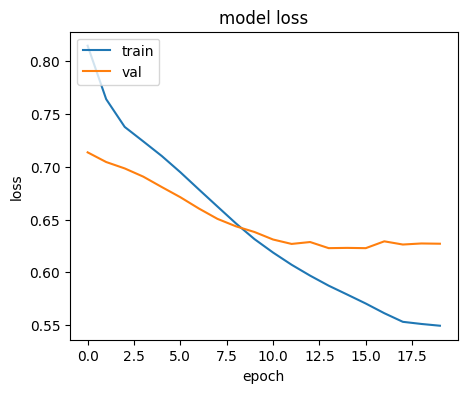

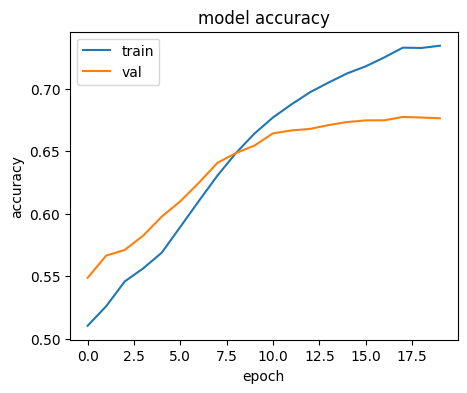

In [ ]:
PlotMeasures(history_g)

In [ ]:
bi_lstm_model=Sequential([
    Embedding(vocab_size, embedding_dim, input_length=maxlen),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.35),
    BatchNormalization(),
    Bidirectional(LSTM(32)),
    Dropout(0.35),
    BatchNormalization(),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1,activation='sigmoid')
])

In [ ]:
bi_lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(0.00001v), metrics=['accuracy'])

In [ ]:
chk_lstm = ModelCheckpoint('model-lstm2.tf',
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

In [ ]:
history_l=bi_lstm_model.fit(train_text,train_labels,
                    validation_data=(val_text,val_labels),
                    epochs=25,
                    batch_size=64,
                    callbacks=[earlystopping,learning_rate_reduction,chk_lstm])

Epoch 1/25
2500/2500 [==============================] - ETA: 0s - loss: 0.6188 - accuracy: 0.6550
Epoch 1: val_loss improved from inf to 0.60071, saving model to model-lstm2.tf
2500/2500 [==============================] - 190s 74ms/step - loss: 0.6188 - accuracy: 0.6550 - val_loss: 0.6007 - val_accuracy: 0.6683 - lr: 5.0000e-04
Epoch 2/25
   2/2500 [..............................] - ETA: 2:41 - loss: 0.5519 - accuracy: 0.7266

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

2500/2500 [==============================] - ETA: 0s - loss: 0.5296 - accuracy: 0.7346
Epoch 2: val_loss improved from 0.60071 to 0.59262, saving model to model-lstm2.tf
2500/2500 [==============================] - 172s 69ms/step - loss: 0.5296 - accuracy: 0.7346 - val_loss: 0.5926 - val_accuracy: 0.6893 - lr: 5.0000e-04
Epoch 3/25
   2/2500 [..............................] - ETA: 2:42 - loss: 0.4591 - accuracy: 0.7891

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

2500/2500 [==============================] - ETA: 0s - loss: 0.4564 - accuracy: 0.7830
Epoch 3: val_loss did not improve from 0.59262
2500/2500 [==============================] - 163s 65ms/step - loss: 0.4564 - accuracy: 0.7830 - val_loss: 0.6186 - val_accuracy: 0.6811 - lr: 5.0000e-04
Epoch 4/25
2500/2500 [==============================] - ETA: 0s - loss: 0.3920 - accuracy: 0.8180
Epoch 4: val_loss did not improve from 0.59262
2500/2500 [==============================] - 163s 65ms/step - loss: 0.3920 - accuracy: 0.8180 - val_loss: 0.6610 - val_accuracy: 0.6730 - lr: 5.0000e-04
Epoch 5/25
2500/2500 [==============================] - ETA: 0s - loss: 0.3393 - accuracy: 0.8451
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 5: val_loss did not improve from 0.59262
2500/2500 [==============================] - 163s 65ms/step - loss: 0.3393 - accuracy: 0.8451 - val_loss: 0.7749 - val_accuracy: 0.6698 - lr: 5.0000e-04
Epoch 6/25
2500/2500 [=================

In [ ]:
model_sample=Sequential([
    Embedding(vocab_size, embedding_dim, input_length=maxlen),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1,activation='sigmoid')
])

In [ ]:
embedding_dim

40

In [ ]:
model_sample.compile(loss='binary_crossentropy', optimizer=Adam(0.0005), metrics=['accuracy'])

In [ ]:
model_sample.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 20, 40)            2628400   
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_14 (Dense)            (None, 16)                12816     
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2641233 (10.08 MB)
Trainable params: 2641233 (10.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
chk_sample = ModelCheckpoint('model-sample.tf',
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

In [ ]:
# model_sample.fit(train_text,train_labels,
#                     validation_data=(val_text,val_labels),
#                     epochs=25,
#                     batch_size=64,
#                     callbacks=[earlystopping,learning_rate_reduction,chk_sample])

In [ ]:
LossesAndScores(history_l)

_________LATEST MEASURES__________
Last Training Accuracy: 0.9005062580108643
Last Validation Accuracy: 0.6613500118255615
Last Training Loss: 0.2206040322780609
Last Validation Loss: 1.1011734008789062
_________BEST MEASURES___________
Maximum Training Accuracy: 0.9005062580108643
Maximum Validation Accuracy: 0.689300000667572
Minimum Training Loss: 0.2206040322780609
Minimum Validation Loss: 0.5926161408424377


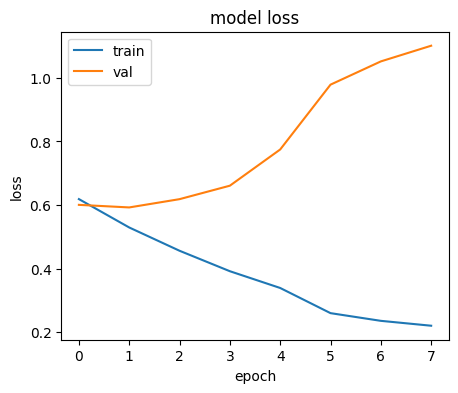

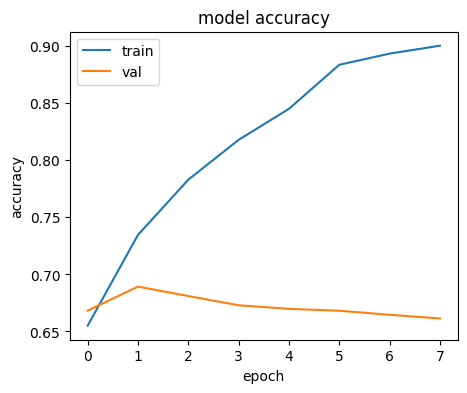

In [ ]:
PlotMeasures(history_l)

In [ ]:
def evaluate_model(model, text_data, labels):
    predictions = model.predict(text_data)
    predictions_binary = (predictions > 0.5).astype(int)

    precision = precision_score(labels, predictions_binary)
    recall = recall_score(labels, predictions_binary)

    f1_score = 2 * (precision * recall) / (precision + recall)


    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:",f1_score)

    conf_matrix = confusion_matrix(labels, predictions_binary)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    plt.subplot(1, 2, 2)
    fpr, tpr, thresholds = roc_curve(labels, predictions)
    auc_score = roc_auc_score(labels, predictions)
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

625/625 [==============================] - 2s 2ms/step
Precision: 0.6840960861462
Recall: 0.6607
F1-score: 0.6721945264014649


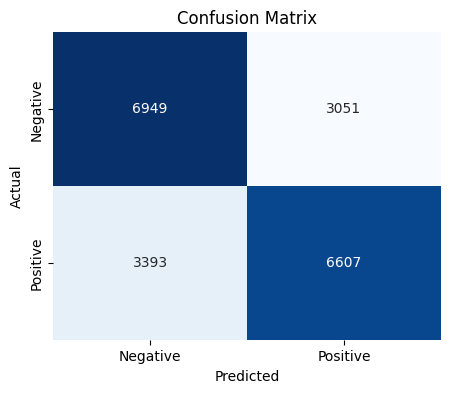

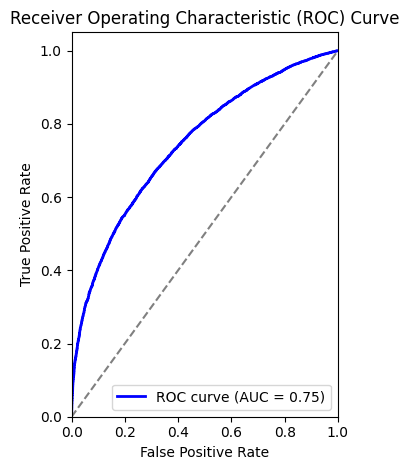

In [ ]:
evaluate_model(model_t,test_text,test_labels)

625/625 [==============================] - 1s 2ms/step
Precision: 0.6988291413703382
Recall: 0.6446
F1-score: 0.6706200582605077


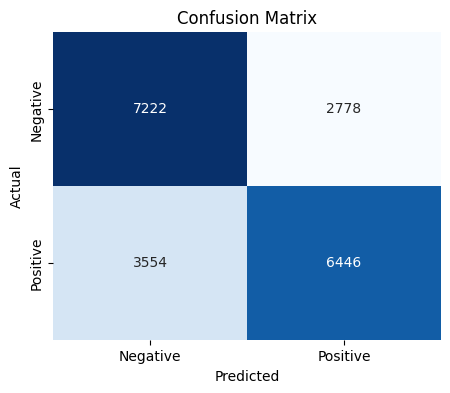

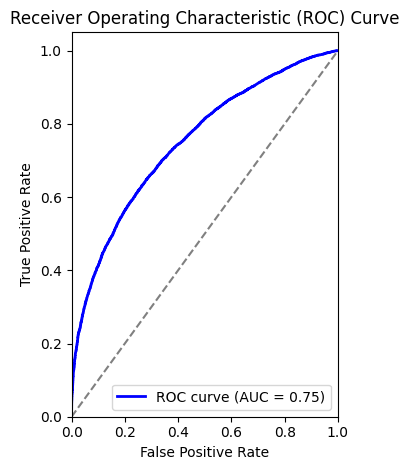

In [ ]:
evaluate_model(siamese_model,test_text,test_labels)

625/625 [==============================] - 9s 13ms/step
Precision: 0.6782037239868565
Recall: 0.6192
F1-score: 0.647360167276529


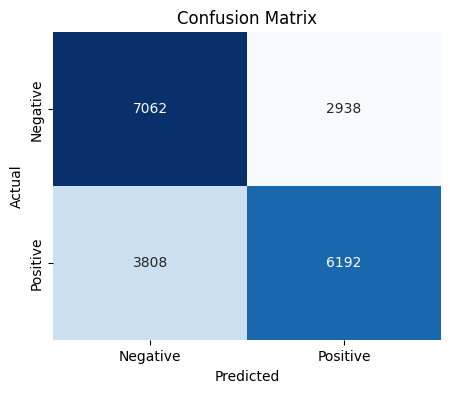

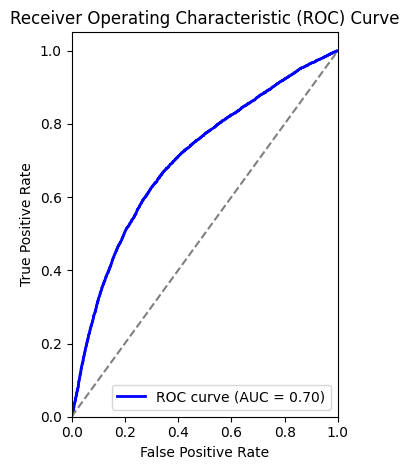

In [ ]:
evaluate_model(bi_lstm_model,test_text,test_labels)

625/625 [==============================] - 10s 16ms/step
Precision: 0.6827099938687922
Recall: 0.6681
F1-score: 0.6753259880723744


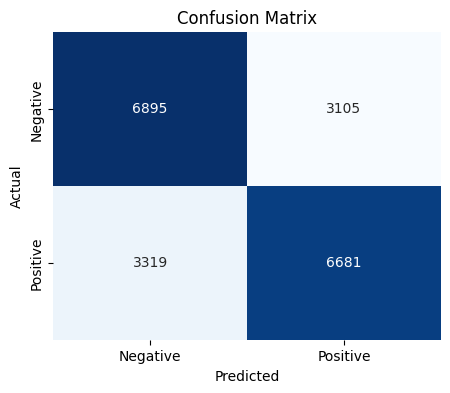

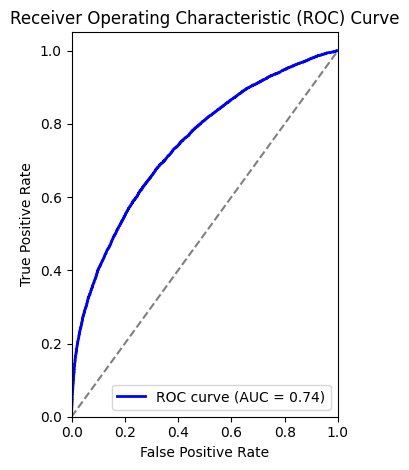

In [ ]:
evaluate_model(bi_gru_model,test_text,test_labels)